In [1]:
%pylab inline
import tables
import numpy as np
import plotly.plotly as py
from plotly.graph_objs import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
viirs = '/home/ubuntu/hydra/data/VNP09GA_NRT.A2018053.h27v07.001.h5'

# read in hdf5 data
h5file = tables.open_file(viirs, mode="r")

# display tree
h5file

File(filename=/home/ubuntu/hydra/data/VNP09GA_NRT.A2018053.h27v07.001.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/SensorAzimuth_c (CArray(358706,), zlib(8)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (32768,)
/SensorZenith_c (CArray(358706,), zlib(8)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (32768,)
/SolarAzimuth_c (CArray(358706,), zlib(8)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (32768,)
/SolarZenith_c (CArray(358706,), zlib(8)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (32768,)
/SurfReflect_I1_c (CArray(790013,), zlib(8)) ''
  atom := Int16Atom(shape=(), dflt=0)
  main

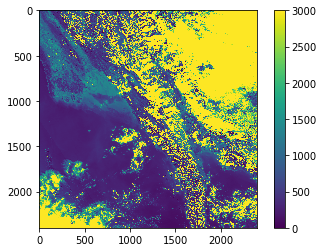

In [4]:
# get red channel node
Ired = h5file.get_node('/HDFEOS/GRIDS/VNP_Grid_500m_2D/Data Fields/SurfReflect_I1_1').read()

# display red channel image
imshow(Ired,cmap='viridis',vmin=0,vmax=3000)
colorbar()

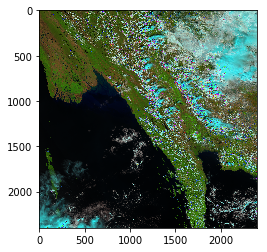

In [4]:
# get the NIR and SWIR nodes
Inir = h5file.get_node('/HDFEOS/GRIDS/VNP_Grid_500m_2D/Data Fields/SurfReflect_I2_1').read()
Iswir = h5file.get_node('/HDFEOS/GRIDS/VNP_Grid_500m_2D/Data Fields/SurfReflect_I3_1').read()

# stack imagery and filter to theoretical range
rgb = np.dstack([Iswir,Inir,Ired])
rgb = np.ma.masked_where(rgb<=0,rgb)
rgb = np.ma.masked_where(rgb>=10000,rgb)

# force to byte range
rgbUint = (rgb/10000.)*255

maxVal = int(0.3*255)
           
# display natural-color image
imshow(rgbUint.astype(uint8),vmax=maxVal)

In [5]:
# close data to make everyone happy
h5file.close()